# adapter-checks

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os

In [2]:
def barplot(items, name):
    """
    Plot average adapter content % per adapter sequence
    """
    stats_list = []
    for stats in items:
        data = pd.read_csv(stats, sep='\t', skiprows=3)
        filename = stats.split('/')[-1]
        data['sample'] = filename
        stats_list.append(data)
    
    long_data = pd.concat(stats_list).reset_index()
    long_data['ReadsPct'] = long_data.ReadsPct.str.slice(0,-1).astype(float)
    
    freq_list = long_data.groupby('#Name')['ReadsPct'].mean().sort_values(ascending=False)
    
    # The actual average frequency list
    # Note that this SUMS to 1%
    fig, ax = plt.subplots(figsize=(3,6))
    freq_list[0:int(min(len(freq_list), 20))].iloc[::-1].plot.barh(ax=ax)
    plt.title(f'Average adapter detected via bbduk ({name})')
    plt.suptitle(f'Sum of below: {sum(freq_list):.03f}%')
    plt.xlabel('% detected')
    plt.ylabel('Adapter sequence')

In [13]:
def heatmap(items, name):
    """
    Plot a per-sample and per-adapter % heatmap
    """
    stats_list = []
    for stats in items:
        data = pd.read_csv(stats, sep='\t', skiprows=3)
        filename = stats.split('/')[-1]
        data['sample'] = filename
        stats_list.append(data)

    df = pd.DataFrame([ x.set_index("#Name").ReadsPct.str.slice(0,-1).astype(float) for x in stats_list ])
    df.index = [ x["sample"][0].split('_')[0] for x in stats_list ]
    # Save data
    df.to_csv(name + "_adapter_percent.csv")
    df = df.T
    df = df[(df > 0.001).T.any()]
    df = df.iloc[0:min(len(df), 30)]
    
    fig, ax = plt.subplots(figsize=(7,7))
    img = ax.imshow(df)
    import numpy as np
    ax.set_yticks(np.arange(len(df.index)), labels=df.index)
    ax.set_xticks(np.arange(len(df.columns)), labels=df.columns)
    _ = plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")
    
    cbar = plt.colorbar(img)
    cbar.ax.set_ylabel("Percentage of reads detected")

In [4]:
files = glob("*_stats.*.txt")

sorted_files = { k:[] for k in [ x.split('.')[-2] for x in files ] }
for x in files:
    name = x.split('.')[-2]
    sorted_files[name].append(x)

items = sorted(list(sorted_files.keys()))

## Average detected adapter percentages (real adapter sequences)

This adapter reference consists of 'bbmap_adapters.fa' combined with detected adapters from bbmerge.
Both parameter combinations are shown.

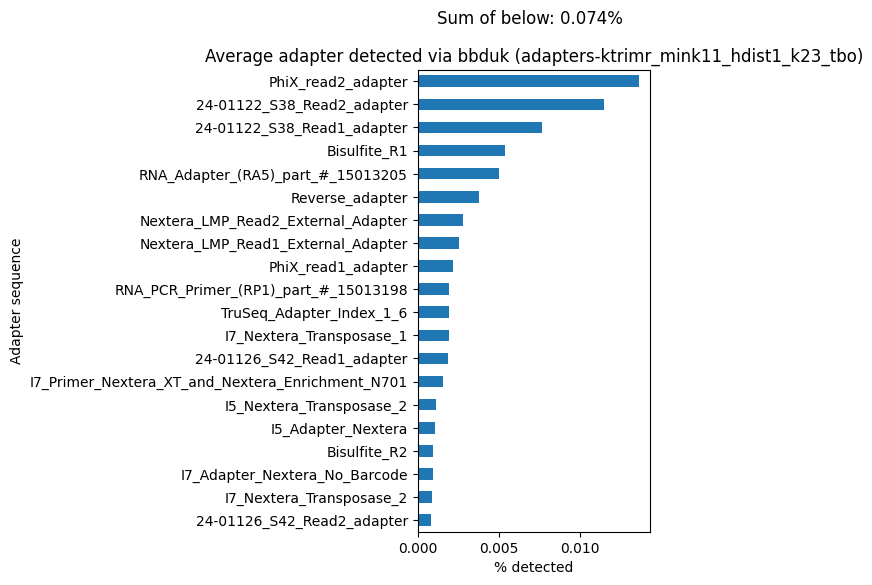

In [5]:
adapters = [ x for x in items if x.startswith('adapters') ]
barplot(sorted_files[adapters[0]], adapters[0])

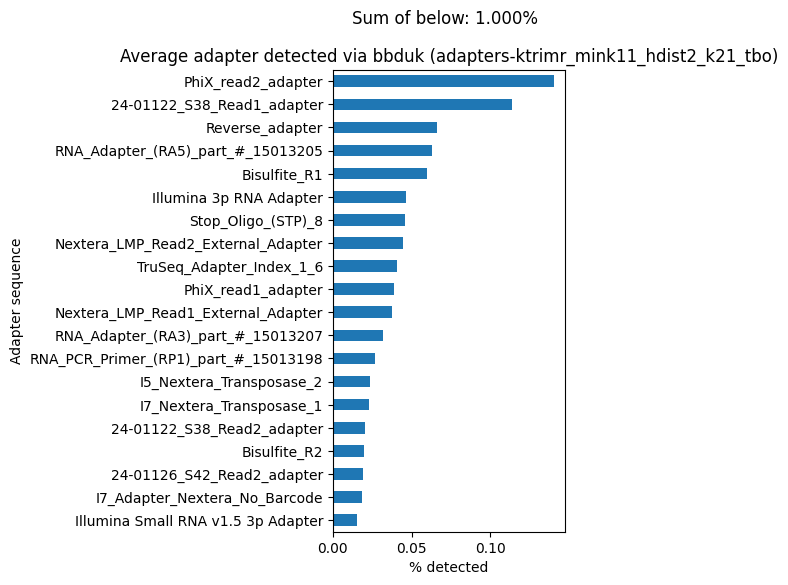

In [6]:
barplot(sorted_files[adapters[1]], adapters[1])

## Average detected adapter percentages (random adapter sequences)

This adapter reference is completely randomly generated, with the same number of sequences as the first.
Both parameter combinations are shown.

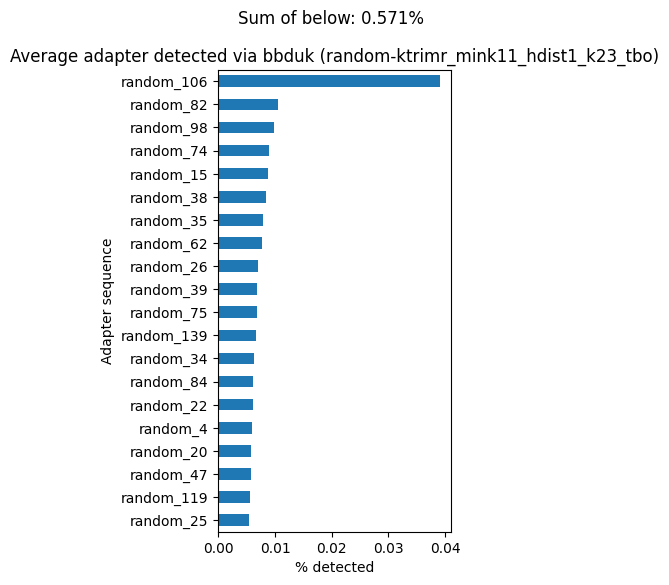

In [7]:
random = [ x for x in items if x.startswith('random') ]
barplot(sorted_files[random[0]], random[0])

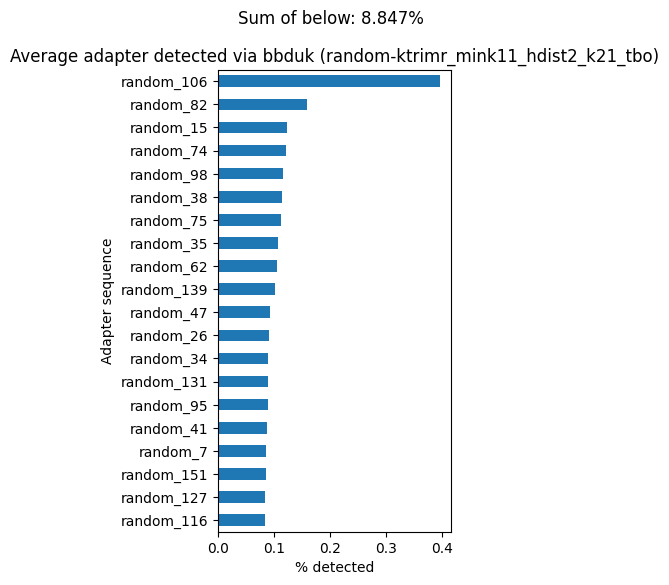

In [8]:
barplot(sorted_files[random[1]], random[1])

# Per-sample heatmaps

Here we plot a heatmap containing each individual sample as well as the top adapters

## Real adapter sequences heatmaps

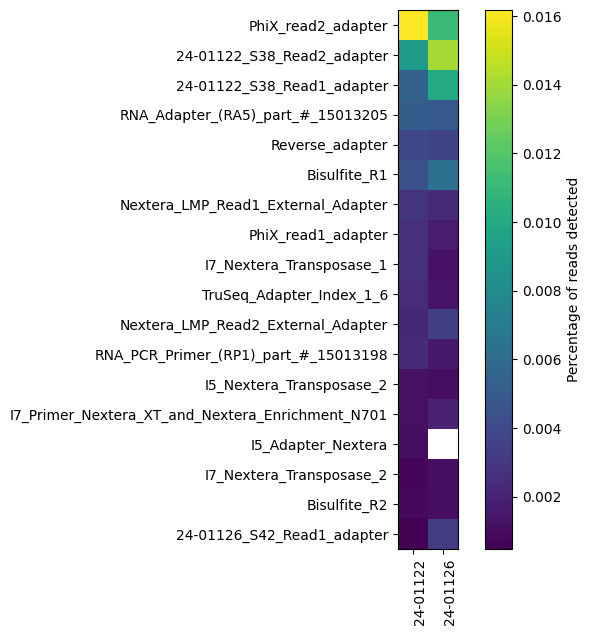

In [9]:
adapters = [ x for x in items if x.startswith('adapters') ]
heatmap(sorted_files[adapters[0]], adapters[0])

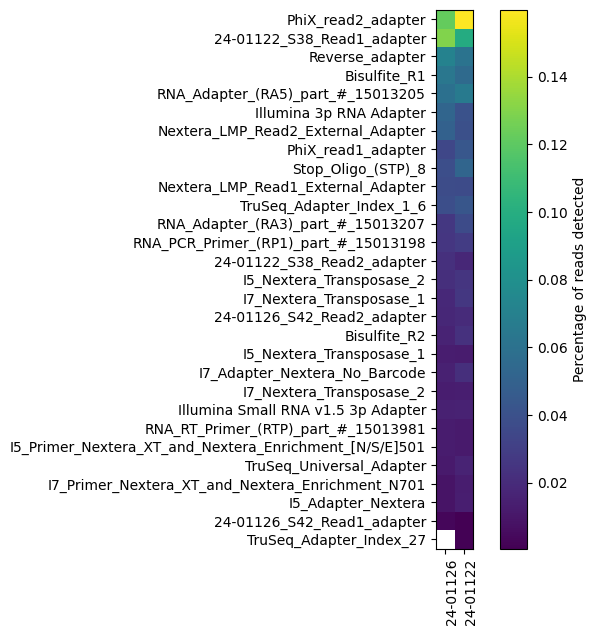

In [10]:
heatmap(sorted_files[adapters[1]], adapters[1])

## Average detected adapter percentages (random adapter sequences)

This adapter reference is completely randomly generated, with the same number of sequences as the first.
Both parameter combinations are shown.

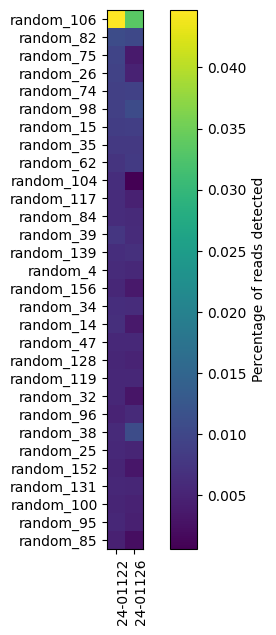

In [11]:
random = [ x for x in items if x.startswith('random') ]
heatmap(sorted_files[random[0]], random[0])

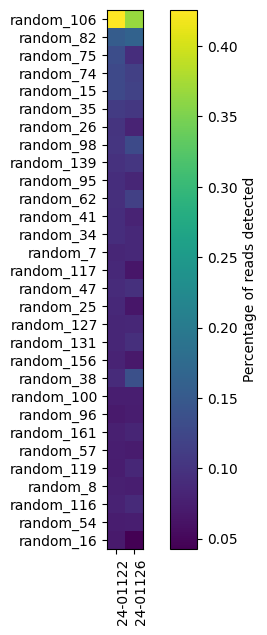

In [12]:
heatmap(sorted_files[random[1]], random[1])